[[To Do]]
* May need to redo plots for Junke’s newest enhancer calls? Right now this is CSAW calls - looks like the repressed ATAC-STARR peaks - Do for the Active STARR peaks
* Add the WGSS signal as another column
* Add more TF classes and epigenetic marks from ENCODE: TF binding data for the families enriched in gkmsvm - Gata1, Foxa1, Tal1, Sp1, Yy1
* What additional Histone marks are available? H3K4me2; H3K36me3


[[To do]]
* Do the same type of plot for MPRA (in aggregate)
* Every row is an MPRA hit from any MPRA dataset we have available


(Less priority for this week)
* Do the same for CRISPR hit where every row is an enrichment
* Do we have access to CRISPRi hits across all regions?
		HCR-FlowFish (16 loci)
		PrimeFlow (Engreitz Lab)


#### Data

WG-STARR: `/data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw`

#### Added WG_STARR from K562 to the already existing heatmaps (repressed regions)

In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/computeMatrix.down.v01.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        ATACseq \
        H3K27ac \
        H3K4me1 \
        H3K4me3 \
        H3K27me3 \
        WG_STARR \
    -R \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.Promoter_lte_1kb.bed \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.Promoter_1_2kb.bed \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.Promoter_2_3kb.bed \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.Intron.bed \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.Exon.bed \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.3prime_UTR.bed \
        /data/reddylab/Alex/tmp/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.down.by_annotation.Distal_Intergenic.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.down.refpoint.mat.gz
    
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.down.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.down.refpoint.plotHeatmap.png
    
EOF



In [ ]:
plotHeatmap \
    --colorMap inferno \
    --zMin 
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.down.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.down.refpoint.plotHeatmap.png


In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.down.refpoint.plotHeatmap.png")

#### Comparison with the active peaks from ATAC-STARRseq including with the WGSTARR seq data

In [ ]:
import pandas as pd

active = pd.read_csv("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.annotated.txt", sep="\t")

def simplify_annotations(a):
    if 'Intron' in a:
        return 'Intron'
    if 'Exon' in a:
        return 'Exon'
    return a

def clean_annotation(a):
    return a.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_").replace("\'", "prime").replace("<=", "lte_").replace("<", "lt_")

active['annotation_simple'] = active.apply(lambda x: simplify_annotations(x['annotation']), axis=1)

output_fn_str = "/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.%s.txt"


for aa in set([simplify_annotations(a) for a in active.annotation.unique().tolist()]):
    active.loc[active.annotation_simple == aa, :]\
        .to_csv(output_fn_str % clean_annotation(aa), sep="\t")
    active.loc[active.annotation_simple == aa, ['seqnames', 'start', 'end']]\
        .to_csv((output_fn_str % clean_annotation(aa)).replace('.txt', '.bed'), sep="\t", header=False, index=False)

In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/computeMatrix.up.v01.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        ATACseq \
        H3K27ac \
        H3K4me1 \
        H3K4me3 \
        H3K27me3 \
        WG_STARR \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Promoter_lte_1kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Promoter_1_2kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Promoter_2_3kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Intron.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Exon.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.3prime_UTR.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Distal_Intergenic.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.refpoint.mat.gz
    
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.refpoint.plotHeatmap.png
    
EOF



In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.refpoint.plotHeatmap.png")


#### TF binding data for:

* GATA1: ENCFF331URE
* FOXA1: ENCFF397QRA
* TAL1: ENCFF700NBW
* SP1: ENCFF475BKW
* YY1: ENCFF927TDC
* H3K4me2: ENCFF054RSU
* H3K36me3: ENCFF296TSL


In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data
cd /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data
curl -SLo K562.ENCFF331URE.GATA1.bw \
    https://www.encodeproject.org/files/ENCFF331URE/@@download/ENCFF331URE.bigWig
curl -SLo K562.ENCFF397QRA.FOXA1.bw \
    https://www.encodeproject.org/files/ENCFF397QRA/@@download/ENCFF397QRA.bigWig
curl -SLo K562.ENCFF700NBW.TAL1.bw \
    https://www.encodeproject.org/files/ENCFF700NBW/@@download/ENCFF700NBW.bigWig
curl -SLo K562.ENCFF475BKW.SP1.bw \
    https://www.encodeproject.org/files/ENCFF475BKW/@@download/ENCFF475BKW.bigWig
curl -SLo K562.ENCFF927TDC.YY1.bw \
    https://www.encodeproject.org/files/ENCFF927TDC/@@download/ENCFF927TDC.bigWig

curl -SLo K562.ENCFF054RSU.H3K4me2.bw \
    https://www.encodeproject.org/files/ENCFF054RSU/@@download/ENCFF054RSU.bigWig
curl -SLo K562.ENCFF296TSL.H3K36me3.bw \
    https://www.encodeproject.org/files/ENCFF296TSL/@@download/ENCFF296TSL.bigWig
    

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/computeMatrix.up.v01.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 ATACseq \
        H3K27ac \
        H3K4me1 \
        H3K4me3 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        WG_STARR \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Promoter_lte_1kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Promoter_1_2kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Promoter_2_3kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Intron.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Exon.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.3prime_UTR.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.ultra_deep.csaw.hg38.v10.log2fc.fdr_0_001.up.by_annotation.Distal_Intergenic.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR-CSAW_hits.refpoint.mat.gz
    
EOF



In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.plotHeatmap.png
EOF
  

In [ ]:
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    --zMax 16 2 2 1 1 2 1 6 7 1 7 1 7 2 600 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.mat.gz \
    -out /data/reddylab/Alex/tmp/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.plotHeatmap.v2.png


In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.plotHeatmap.png")


## For aggregated MPRA regions

In [ ]:
%%bash
/data/common/shared_conda_envs/ucsc/bin/bigWigMerge \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/FADS_tiling20190828_pos.b38_1bpWindow.bw \
    /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/OL43_K562_20211228.bp.bw \
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bedGraph

bedGraph for tiling MPRA: `/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bedGraph`<br>

Annotated file for tiling MPRA:
`/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.annotated.txt`

#### Annotation for MPRA

In [ ]:
import pandas as pd

active = pd.read_csv("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.annotated.txt", sep="\t")

def simplify_annotations(a):
    if 'Intron' in a:
        return 'Intron'
    if 'Exon' in a:
        return 'Exon'
    return a

def clean_annotation(a):
    return a.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_").replace("\'", "prime").replace("<=", "lte_").replace("<", "lt_")

active['annotation_simple'] = active.apply(lambda x: simplify_annotations(x['annotation']), axis=1)

output_fn_str = "/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.%s.txt"


for aa in set([simplify_annotations(a) for a in active.annotation.unique().tolist()]):
    active.loc[active.annotation_simple == aa, :]\
        .to_csv(output_fn_str % clean_annotation(aa), sep="\t")
    active.loc[active.annotation_simple == aa, ['seqnames', 'start', 'end']]\
        .to_csv((output_fn_str % clean_annotation(aa)).replace('.txt', '.bed'), sep="\t", header=False, index=False)

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/logs/computeMatrix.up.v01.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 \
        ATACseq \
        H3K27ac \
        H3K4me1 \
        H3K4me3 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        WG_STARR \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.Promoter_lte_1kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.Promoter_1_2kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.Promoter_2_3kb.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.Intron.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.Exon.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.3prime_UTR.bed \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.by_annotation.Distal_Intergenic.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.mat.gz
    
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.plotHeatmap.png

EOF

In [ ]:
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    --zMax 16 2 2 1 1 2 1 6 7 1 7 1 7 2 350 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.mat.gz \
    -out /data/reddylab/Alex/tmp/tiling_MPRA_GATA_MYC_FADS_1bpWindow.plotHeatmap.png


In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.plotHeatmap.png")


In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Promoter_lte_1kb \
        Promoter_1_2kb \
        Promoter_2_3kb \
        Intron \
        Exon \
        3prime_UTR \
        Distal_Intergenic \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/atacSTARR.hg38.v10.csaw.fdr_0_001.up.more_TFs.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.plotHeatmap.png
EOF
  

In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/tiling_MPRA_GATA_MYC_FADS_1bpWindow.refpoint.mat.gz

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Maria/human-th-ms_new/data_v1/ATACseq/raw_data/logscomputeMatrix.mpra.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/tiling_MPRA_GATA_MYC_FADS_1bpWindow.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 \
        YY1 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        ATACseq \
        tewheyMPRA \
        WG_STARR \
        ASTARR_input \
        ASTARR_output \
        ASTARR_log2 \
        CRISPRi \
    -R \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_intersected_lenti_mpra_orientation_dep_call_all.bed \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/lenti_mpra_intersected_tewhey_mpra_orientation_dep_call_all.bed \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/mpra_lenti_tewhey.hits.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/mpra_lenti_tewhey.hits.refpoint.mat.gz
# ^-- Extract some stats for plotting

EOF

In [ ]:
!wc -l /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.bed

In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.bdg

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        tewhey_only \
        tewhey_lenti \
        lenti_tewhey \
        lenti_only \
    --zMax 6 2 1 1 1 2 1 2 5 2 5 1 8 2 8 8 50000 15 150 1 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -0.05 \
    -m /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/mpra_lenti_tewhey.hits.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/03152022/data/enhancer_call_comparison/mpra_lenti_tewhey.hits.plotHeatmap.png
EOF

In [ ]:
%%bash
/data/common/shared_conda_envs/ucsc/bin/bigWigToBedGraph /data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
/data/reddylab/Revathy/collabs/Jamborees/03152022/data/bigWigs/CRISPRi_rAVG_log2FC_2.bdg

### Generate heatmaps based on the new format

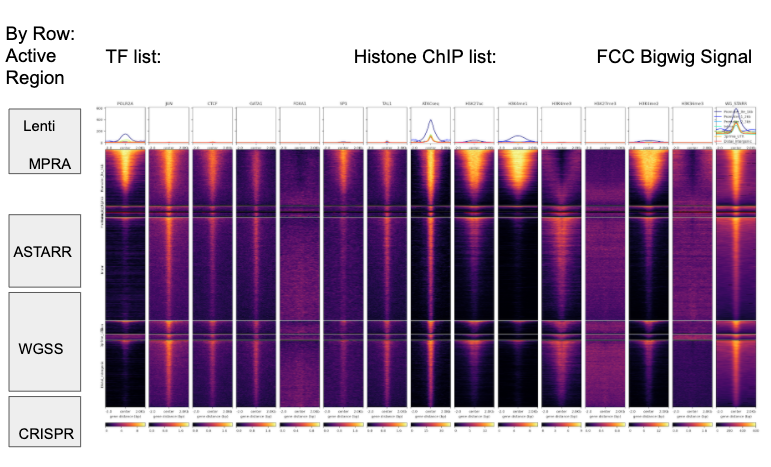


- Use Junke's new enhancer calls for the ATAC-STARR data :
  * 30bp_binsize_10bp_step: `/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed`
  * 100bp_binsize_10bp_step: `/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed_100bp_bin`
  
- for the rest of the assays, uniform processing pipeline enhancer calls haven't been generated yet, hence use the already existing data enhancer cals haven't been 

In [ ]:
%%bash
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_down_in_each_orientation.bed
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed_100bp_bin/merged_peak/merged_sig_down_in_each_orientation.bed


In [ ]:
%%bash
sbatch \
    --exclude=dl-01 \
    --mem 16G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/BwtoBdg.out \
    <<'EOF'
#!/bin/bash
/data/common/shared_conda_envs/ucsc/bin/bigWigToBedGraph /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
/data/reddylab/Revathy/tmp/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bdg
EOF

In [ ]:
%%bash
sbatch \
    --exclude=dl-01 \
    --array=0-20 \
    --mem 16G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/MinMax.%a.out \
    <<'EOF'
#!/bin/bash
files=(\ 
/data/reddylab/Revathy/tmp/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bdg \
/data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF054RSU.H3K4me2.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF100FDI.H3K4me1.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF296TSL.H3K36me3.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF331URE.GATA1.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF336UPT.CTCF.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF357GNC.ATACseq.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF397QRA.FOXA1.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF405ZDL.H3K4me3.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF469JMR.H3K27ac.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF475BKW.SP1.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF665RDD.H3K27me3.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF700NBW.TAL1.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF756UVW.JUN.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF914WIS.POLR2A.bdg \
/data/reddylab/Revathy/tmp/K562.ENCFF927TDC.YY1.bdg \
/data/reddylab/Revathy/tmp/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bdg \
/data/reddylab/Revathy/tmp/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bdg \
/data/reddylab/Revathy/tmp/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bdg \
)
file=${files[${SLURM_ARRAY_TASK_ID}]}
cat ${file} | sort -k4,4n > ${file/.bdg/.sorted_activity.bdg}
EOF

In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.new_v1.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 \
        YY1 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        ATACseq \
        tewheyMPRA \
        WG_STARR \
        ASTARR_input \
        ASTARR_output \
        ASTARR_log2 \
        CRISPRi \
    -R \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_down_in_each_orientation.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_up_in_each_orientation.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deep_ASTARR_Junke_new_calls.hits.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deep_ASTARR_Junke_new_calls.hits.refpoint.mat.gz
# ^-- Extract some stats for plotting

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        tewhey \
        lenti \
        ASTARR_Junke_merged_sig_down \
        ASTARR_Junke_merged_sig_up \
    --zMax 6 2 1 1 1 2 1 2 5 2 5 1 8 2 8 8 8 5 150 3 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -1 0 -1 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deep_ASTARR_Junke_new_calls.hits.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deep_ASTARR_Junke_new_calls.hits.plotHeatmap.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deep_ASTARR_Junke_new_calls.hits.plotHeatmap.png")


In [ ]:
%%bash
gunzip /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deep_ASTARR_Junke_new_calls.hits.refpoint.mat.gz | head

## Download CRISPR data from the ENCODE portal


https://www.encodeproject.org/report/?searchTerm=elements+quantifications+CRISPR&type=File&file_format=bed&field=%40id&field=biosample_ontology.term_name&field=aliases&field=assay_title&field=biosample_ontology


In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR
curl -SLo K562.ENCFF227DUX.FADS3.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF227DUX/@@download/ENCFF227DUX.bed.gz
curl -SLo K562.ENCFF151MNC.FEN1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF151MNC/@@download/ENCFF151MNC.bed.gz
curl -SLo K562.ENCFF619FXH.CAT.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF619FXH/@@download/ENCFF619FXH.bed.gz
curl -SLo K562.ENCFF149IDL.FADS2.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF149IDL/@@download/ENCFF149IDL.bed.gz
curl -SLo K562.ENCFF469FXP.LMO2.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF469FXP/@@download/ENCFF469FXP.bed.gz
curl -SLo K562.ENCFF845YHV.HBE1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF845YHV/@@download/ENCFF845YHV.bed.gz
curl -SLo K562.ENCFF632PQY.HDAC6.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF632PQY/@@download/ENCFF632PQY.bed.gz
curl -SLo K562.ENCFF413WYU.GATA1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF413WYU/@@download/ENCFF413WYU.bed.gz
curl -SLo K562.ENCFF894DJT.FADS3.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF894DJT/@@download/ENCFF894DJT.bed.gz
curl -SLo K562.ENCFF337VVS.HBS1L.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF337VVS/@@download/ENCFF337VVS.bed.gz
curl -SLo K562.ENCFF240IPT.MYC.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF240IPT/@@download/ENCFF240IPT.bed.gz
curl -SLo K562.ENCFF863AVQ.CAPRIN1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF863AVQ/@@download/ENCFF863AVQ.bed.gz
curl -SLo K562.ENCFF270LYK.CD164.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF270LYK/@@download/ENCFF270LYK.bed.gz
curl -SLo K562.ENCFF786ZPA.FADS1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF786ZPA/@@download/ENCFF786ZPA.bed.gz
curl -SLo K562.ENCFF005DTR.PVT1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF005DTR/@@download/ENCFF005DTR.bed.gz
curl -SLo K562.ENCFF270ZLE.NMU.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF270ZLE/@@download/ENCFF270ZLE.bed.gz
curl -SLo K562.ENCFF910PDZ.HBG2.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF910PDZ/@@download/ENCFF910PDZ.bed.gz
curl -SLo K562.ENCFF813GCK.ERP29.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF813GCK/@@download/ENCFF813GCK.bed.gz  
curl -SLo K562.ENCFF811PPJ.HBG1.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF811PPJ/@@download/ENCFF811PPJ.bed.gz
curl -SLo K562.ENCFF091IOP.MYB.peakwise.bed.gz \
    https://www.encodeproject.org/files/ENCFF091IOP/@@download/ENCFF091IOP.bed.gz

In [ ]:
%%bash 
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR
cat *.peakwise.bed | sort -k1,1 -k2,2n > K562.merged_peaks_from_HCRFF_SabetiLab.peakwise.bed

In [2]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.peakwise.bed

98 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.peakwise.bed


In [ ]:
%%bash
cat /data/reddylab/Alex/collab/20181203_Tyler/data/allen_order_beta_test/k562-wgCERES-discovery.dhs_allen_test_v2_df.bnd_3.fdr_0.05.hg38.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.peakwise.bed \
| sort -k1,1 -k2,2n > /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/k562_wgCERES_DHShits.HCRFF_SabetiLab.merged.bed

In [ ]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/k562_wgCERES_DHShits.HCRFF_SabetiLab.merged.bed

In [ ]:
!wc -l /data/reddylab/Alex/collab/20181203_Tyler/data/allen_order_beta_test/k562-wgCERES-discovery.dhs_allen_test_v2_df.bnd_3.fdr_0.05.hg38.bed

### Heatmap with the CRISPR elements quantification data from Sabeti Lab
(HCRFLowFISH for 20 loci)

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.new_v3.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 \
        YY1 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        ATACseq \
        ASTARR_input \
        ASTARR_output \
        ASTARR_log2FC \
        wgSTARR \
        CRISPRi \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/k562_wgCERES_DHShits.HCRFF_SabetiLab.merged.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.wgCERES_DHShits.HCRFLowFISH_SabetiLab.hits.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.wgCERES_DHShits.HCRFLowFISH.SabetiLab.hits.refpoint.mat.gz
# ^-- Extract some stats for plotting

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        CRISPR_HCRFlowFISH \
    --zMax 6 2 1 1 1 2 1 2 5 2 5 1 8 2 8 8 8 5 150 8 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -5 0 -2 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.wgCERES_DHShits.HCRFLowFISH_SabetiLab.hits.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.wgCERES_DHShits.HCRFLowFISH_SabetiLab.hits.plotHeatmap.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.wgCERES_DHShits.HCRFLowFISH_SabetiLab.hits.plotHeatmap.png")


### Heatmap with Junke's new Enhancer calls for K562 deepASTARR alone

In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.new_v2.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 \
        YY1 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        ATACseq \
        ASTARR_input \
        ASTARR_output \
        ASTARR_log2FC \
        wgSTARR \
        CRISPRi \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_down_in_each_orientation.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_up_in_each_orientation.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_ASTARR_Junke_new_calls.sig_up_down.hits.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_ASTARR_Junke_new_calls.sig_up_down.hits.refpoint.mat.gz
# ^-- Extract some stats for plotting

EOF

## Heatmap with ASTARR(up), Lenti, Tewhey, wgSTARR - random sampled 
cradle peaks for wgSTARR: `/data/reddylab/kstrouse/superstarr/output_libs/A001_K562/CRADLE/CRADLEcorr_kmer36/peaks/fdr0.05/CRADLE_peaks`

In [ ]:
%%bash
wc -l /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_up_in_each_orientation.bed \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/CRADLE/CRADLEcorr_kmer36/peaks/fdr0.05/CRADLE_peaks

### Random sample from lenti, wgSTARR, ASTARR(up)

In [ ]:
%%bash
shuf -n 5000 /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.random5000.bed
shuf -n 5000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/merged_peak/merged_sig_up_in_each_orientation.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_ASTARR.30bp_bin.merged_sig_up_in_each_orientation.random5000.bed
shuf -n 5000 /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/CRADLE/CRADLEcorr_kmer36/peaks/fdr0.05/CRADLE_peaks \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/wgSTARR_CRADLE_peakcalls.random5000.bed
shuf -n 5000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/k562_wgCERES_DHShits.HCRFF_SabetiLab.merged.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_DHShits.HCRFF_SabetiLab.merged.random5000.bed

In [2]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/processed/bin_level/

all_bin_tested_in_both_orientations.bed
inactive_bins_with_log2FC.input_sorted.bed
inactive_bins_with_log2FC.input_sorted.GC_content.txt
inactive_bins_with_log2FC.input_sorted.logFC_threshold0.5.bed
inactive_bins_with_log2FC.input_sorted.random5000.bed
inactive_bins_with_raw_count.bed
inactive_bins_with_raw_count.merged.bed
inactive_bins_with_raw_count.merged.logFC_threshold0.5.bed
inactive_bins_with_raw_count.merged.random10k.bed
inactive_bins_with_raw_count.merged.random5k.bed
inactive_bins_with_raw_count.merged.random5k_with_log2FC.bed
inactive_with_input_peaks.GC_content_active_peaks.random5000.bed
orientation_independent_significantly_up_regulated_bins.bed
significantly_down_regulated_bins_with_raw_count.bed
significantly_up_regulated_bins_with_raw_count.bed
unique_inactive_bins_with_input_peaks.logFC_filtered.bed


In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/*.random5000.bed

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.new_v4.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF397QRA.FOXA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF665RDD.H3K27me3.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF054RSU.H3K4me2.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF296TSL.H3K36me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/atac_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-blacklist-removal/merged2/KS91_K562_hg38_ASTARRseq_Input_rep4.masked.exclude_dups.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.f3q10.sorted.with_umis.dedup.cpm.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        FOXA1 \
        SP1 \
        TAL1 \
        YY1 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        H3K27me3 \
        H3K4me2 \
        H3K36me3 \
        ATACseq \
        WG_STARR \
        ASTARR_input \
        ASTARR_output \
        ASTARR_log2 \
        CRISPRi \
    -R \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_ASTARR.30bp_bin.merged_sig_up_in_each_orientation.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/wgSTARR_CRADLE_peakcalls.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_DHShits.HCRFF_SabetiLab.merged.random5000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.refpoint.mat.gz
# ^-- Extract some stats for plotting

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Tewhey_MPRA \
        ASTARR_Up \
        Lenti_MPRA \
        wgSTARR_CRADLE \
        CRISPR_wgCERES_HCRFlowFISH \
    --zMax 6 2 1 1 1 2 1 2 5 2 5 1 8 2 8 8 8 0.01 1000 8 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 -3 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.plotHeatmap.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.plotHeatmap.png")


# Changes to be made/incorporated - 10/7

* Use the upregulated/active peaks from wgSTARR CRADLE peaks instead of all peaks
* Include all 98 CRISPR peaks from the HCRFlowFISH growth screen in the CRISPR_random5000 dataset
* Remove some of the unwanted Histone marks(H3k36me3), ASTARR input and output -- retain the ASTARR log2FC
* Include EP300 as one of the TF marks 

In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_enhancer_calls_5Oct/

In [ ]:
### Active peaks from wgSTARR CRADLE

import pandas as pd

wgstarr_cradle = pd.read_csv('/data/reddylab/kstrouse/superstarr/output_libs/A001_K562/CRADLE/CRADLEcorr_kmer36/peaks/fdr0.05/CRADLE_peaks', sep='\t')
wgstarr_cradle[wgstarr_cradle.effectSize>1].to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/K562_wgSTARR_active_cradle_peaks.txt', sep='\t', index=False)

In [ ]:
%%bash
shuf -n 5000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/K562_wgSTARR_active_cradle_peaks.txt \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/K562_wgSTARR_active_cradle_peaks.random5000.bed 

In [ ]:
%%bash
cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.peakwise.bed \
| cut -f1-6 > /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.cut.peakwise.bed


In [ ]:
%%bash
shuf -n 4902 /data/reddylab/Alex/collab/20181203_Tyler/data/allen_order_beta_test/k562-wgCERES-discovery.dhs_allen_test_v2_df.bnd_3.fdr_0.05.hg38.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_discovery_screen.dhs_hits.random4902.bed
cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_discovery_screen.dhs_hits.random4902.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.cut.peakwise.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_dhsHits_all_HCRFF_Sabeti_Lab.random5000.bed

In [ ]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/
curl -SLo K562.ENCFF325DSL.EP300.bw \
    https://www.encodeproject.org/files/ENCFF325DSL/@@download/ENCFF325DSL.bigWig

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.new_v5.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        SP1 \
        TAL1 \
        YY1 \
        EP300 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi \
    -R \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_ASTARR.30bp_bin.merged_sig_up_in_each_orientation.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/K562_wgSTARR_active_cradle_peaks.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_dhsHits_all_HCRFF_Sabeti_Lab.random5000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v03.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v03.refpoint.mat.gz

EOF

In [ ]:
!head /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_dhsHits_all_HCRFF_Sabeti_Lab.random5000.bed

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        Tewhey_MPRA \
        ASTARR_Up \
        Lenti_MPRA \
        wgSTARR_CRADLE \
        CRISPR_wgCERES_HCRFlowFISH \
    --zMax 6 2 1 1 2 1 2 2 2 2 2 8 0.01 1000 1 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 0 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v02.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v02.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v02.png")


### Scaling w.r.t to Peaks of TFs

In [ ]:
%%bash
mkdir -p /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/peaksets_for_scaling
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/peaksets_for_scaling
curl -SLo K562.ENCFF355MNE.POL2A.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF355MNE/@@download/ENCFF355MNE.bed.gz
curl -SLo K562.ENCFF190CGV.JUN.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF190CGV/@@download/ENCFF190CGV.bed.gz
curl -SLo K562.ENCFF396BZQ.CTCF.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF396BZQ/@@download/ENCFF396BZQ.bed.gz
curl -SLo K562.ENCFF657CTC.GATA1.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF657CTC/@@download/ENCFF657CTC.bed.gz
curl -SLo K562.ENCFF553GPK.SP1.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF553GPK/@@download/ENCFF553GPK.bed.gz
curl -SLo K562.ENCFF852ZRK.TAL1.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF852ZRK/@@download/ENCFF852ZRK.bed.gz
curl -SLo K562.ENCFF398UQZ.YY1.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF398UQZ/@@download/ENCFF398UQZ.bed.gz
curl -SLo K562.ENCFF544LXB.H3K27ac.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF544LXB/@@download/ENCFF544LXB.bed.gz
curl -SLo K562.ENCFF616DLO.H3K4me3.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF616DLO/@@download/ENCFF616DLO.bed.gz
curl -SLo K562.ENCFF759NWD.H3K4me1.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF759NWD/@@download/ENCFF759NWD.bed.gz
curl -SLo K562.ENCFF333TAT.ATACseq.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF333TAT/@@download/ENCFF333TAT.bed.gz

In [ ]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/peaksets_for_scaling
curl -SLo K562.ENCFF702XPO.EP300.regionPeak.gz \
https://www.encodeproject.org/files/ENCFF702XPO/@@download/ENCFF702XPO.bed.gz


#### Min-Max values from the peak files:

In [ ]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/peaksets_for_scaling
for ii in $(/bin/ls *.regionPeak);
do 
echo ${ii}
cat ${ii} | sort -nk7,7 | awk '{print $7}' | tail -1
cat ${ii} | sort -nk7,7 | awk '{print $7}' | head -1
done

In [ ]:
import pandas as pd
import glob

keys=[f for f in glob.glob('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/peaksets_for_scaling/'+ '*.regionPeak')]

for file in keys:
    tmp = pd.read_csv(file, sep='\t', names=['chr','start','end','name','score','strand','signalVal','pVal','qVal','peak'])
    percent = tmp.signalVal.quantile(0.50)
    print(file)
    print(percent)






In [ ]:
!cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/peaksets_for_scaling/K562.ENCFF396BZQ.CTCF.regionPeak | sort -nk7,7 | head -20

#### v4 version of the heatmap & v2 version of the computeMatrix 
* with the scaling teased out both for the heatmaps and the profile plots -- doesn't include the wgSTARR_log2FC in the columns

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --yMax 125 20 30 15 30 35 35 40 30 85 10 775 .1 700 1 \
    --yMin   0  0  0  0  0  0  0  0  0  0  0   0 -.001 0 -1 \
    --regionsLabel \
        Tewhey_MPRA \
        Lenti_MPRA \
        ASTARR_Up \
        wgSTARR_CRADLE \
        CRISPR_wgCERES_HCRFlowFISH \
    --zMax 200 43 157 52 147 108 56 73 9 30 7 5 0.03 1000 1 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 0 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v02.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v04.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v04.png")


#### v5 version of the heatmap and v3 version of the computeMatrix
- wgSTARR_log2FC included into the columns
- need to fix the scaling for wgSTARR_log2FC both the heatmap and profile plots

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --yMax 125 20 30 15 30 35 35 40 30 85 10 775 .1 700 1 1 \
    --yMin   0  0  0  0  0  0  0  0  0  0  0   0 -.001 0 1 -1 \
    --regionsLabel \
        Tewhey_MPRA \
        Lenti_MPRA \
        ASTARR_Up \
        wgSTARR_CRADLE \
        CRISPR_wgCERES_HCRFlowFISH \
    --zMax 200 43 157 52 147 108 56 73 9 30 7 5 0.03 1000 1 1 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 1 0 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v03.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v05.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v05.png")


In [ ]:
%%bash
sbatch \
    --exclude=dl-01 \
    -o /data/reddylab/Revathy/tmp/minMax_crispri.out \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
cat /data/reddylab/Revathy/tmp/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bdg | sort -nk4,4 | head -1
cat /data/reddylab/Revathy/tmp/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bdg | sort -nk4,4 | tail -1
EOF

### Corrections - 10/13

- [x] Correct the CRISPR coordinates to make it 200bp instead of 1bp - inorder to see some activity in the CRISPRi column
- [ ] Make heatmap just for the Sabeti Lab- HCRFlowFISH data - to see how that appears - apply scaling conditions as necessary
- [ ] Inspect the heatmap made for all of the ASTARR data - Junke's newest enhancer calls - apply scaling 
- [ ] For each of the row dataset - separate into promoter and distal elements
- [ ] Inspect the ASTARR repressed regions for REST and SNA1l TFs - those that had activity/campe up relevant in Dustin's gkmSVM


##### CRISPRi coordinate expansion

In [ ]:
%%bash
head /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.bdg

In [ ]:
%%bash
bedtools slop \
-i /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.bdg \
-g /data/reddylab/Reference_Data/Genomes/hg38/hg38.fa.chrom.sizes \
-l 199 \
-r 200 \
> /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.bdg 

In [ ]:
%%bash
module load bedtools2
bedtools merge -i /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.bdg \
-c 4 -o mean > /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.merged.bdg

In [ ]:
%%bash
cat /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.merged.bdg | sort -nk4,4 | head -1
cat /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.merged.bdg | sort -nk4,4 | tail -1

In [ ]:
!head /data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.merged.bdg

In [ ]:
%%bash
/data/common/shared_conda_envs/ucsc/bin/bedGraphToBigWig \
/data/reddylab/Revathy/tmp/CRISPRi_rAVG_log2FC_2.sloped400bp.merged.bdg \
/data/reddylab/Reference_Data/Genomes/hg38/hg38.fa.chrom.sizes \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.new_v7.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        SP1 \
        TAL1 \
        YY1 \
        EP300 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220706_fcc_capstone/data/tewhey_mpra_orientation_dep_call_all.merged.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/lenti_mpra_orientation_dep_call_all.merged.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/Junke_ASTARR.30bp_bin.merged_sig_up_in_each_orientation.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/K562_wgSTARR_active_cradle_peaks.random5000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/k562_wgCERES_dhsHits_all_HCRFF_Sabeti_Lab.random5000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v05.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v05.refpoint.mat.gz

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/plotHeatmap_v06.out \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --yMax 125 20 30 15 30 35 35 40 30 85 10 775 .1 700 0.01 1 \
    --yMin   0  0  0  0  0  0  0  0  0  0  0   0 -.001 0 -0.01 -1 \
    --regionsLabel \
        Tewhey_MPRA \
        Lenti_MPRA \
        ASTARR_Up \
        wgSTARR_CRADLE \
        CRISPR_wgCERES_HCRFlowFISH \
    --zMax 200 43 20 52 147 108 56 73 9 30 7 5 0.03 1000 0.01 0.5 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 -0.001 -0.5 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v05.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v07.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v07.png")


## Annotation

In [ ]:
!ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/*.txt

In [ ]:
import pandas as pd

files=['/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_merged_peaks_from_HCRFF_SabetiLab.annotated.txt',
'/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/k562-wgCERES-discovery.annotated.txt',
'/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.txt',
'/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.txt',
'/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.txt',
'/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/tewhey_mpra_orientation_dep_call_all.annotated.txt'
]

for file in files:
    file_name='.'.join(file.split('/')[-1].split('.')[:-1])
    tmp = pd.read_csv(file, sep='\t')
    tmp[tmp['annotation'].str.contains('Promoter')].to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/%s.promoter.txt'%file_name, sep='\t', index=False)
    tmp[~tmp['annotation'].str.contains('Promoter')].to_csv('/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/%s.rest.txt'%file_name, sep='\t', index=False)
    

In [ ]:
%%bash
wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/*.promoter.txt

In [ ]:
%%bash
cd /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation
files=$(/bin/ls *.promoter.txt)
for file in ${files[@]};
do
cat ${file} | tail -n+2 | cut -f1,2,3 \
> ${file/.txt/.coordinates.bed}
done

In [ ]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/*.bed

In [ ]:
%%bash
shuf -n 4000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.promoter.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.promoter.coordinates.random4000.bed
shuf -n 4000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.promoter.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.promoter.coordinates.random4000.bed
shuf -n 4000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.promoter.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.promoter.coordinates.random4000.bed
cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_merged_peaks_from_HCRFF_SabetiLab.annotated.promoter.coordinates.bed \
/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/k562-wgCERES-discovery.annotated.promoter.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562.merged_HCRFF_wgCERES.annotated.promoter.coordinates.all.bed

shuf -n 4000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.rest.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.rest.coordinates.random4000.bed
shuf -n 4000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.rest.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.rest.coordinates.random4000.bed
shuf -n 4000 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.rest.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.rest.coordinates.random4000.bed
shuf -n 3944 /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/k562-wgCERES-discovery.annotated.rest.coordinates.bed \
| cat /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_merged_peaks_from_HCRFF_SabetiLab.annotated.rest.coordinates.bed \
> /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562.merged_HCRFF_wgCERES.annotated.rest.coordinates.random4000.bed




In [ ]:
%%bash
ls /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/*rest.coordinates.*bed

### heatmap separated out for the promoters and rest for rows (enhancer calls from assay types)

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/heatmap_annotated_random2000.v1.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        SP1 \
        TAL1 \
        YY1 \
        EP300 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/tewhey_mpra_orientation_dep_call_all.annotated.promoter.coordinates.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/tewhey_mpra_orientation_dep_call_all.annotated.rest.coordinates.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.promoter.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.rest.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.promoter.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.rest.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.promoter.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.rest.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562.merged_HCRFF_wgCERES.annotated.promoter.coordinates.all.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562.merged_HCRFF_wgCERES.annotated.rest.coordinates.random4000.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters_vs_rest.random4000hits.v01.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters_vs_rest.random4000hits.v01.refpoint.mat.gz

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/plotHeatmap_annotated_random4000_v1.out \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
# --zMax 80 10 5 15 70 50 25 35 3 15 3 2 0.015 500 0.05 1 \

plotHeatmap \
    --colorMap inferno \
    --yMax 300 20 20 20 80 80 80 60 60 200 20 1200 0.5 1000 0.005 2 \
    --yMin   0  0  0  0  0  0  0  0  0  0  0   0 -.001 100 0 -0.5 \
    --regionsLabel \
        TewheyMPRA_promoters \
        TewheyMPRA_distal \
        LentiMPRA_promoters \
        LentiMPRA_distal \
        ASTARRUp_promoters \
        ASTARRUp_distal \
        wgSTARR_promoters \
        wgSTARR_distal \
        CRISPR_promoters \
        CRISPR_promoters \
    --zMax 200 43 20 52 147 108 56 73 9 30 7 5 0.03 1000 0.01 0.5 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 -0.001 -0.5 \
    --heatmapHeight 25 \
    --legendLocation best \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters_vs_rest.random4000hits.v01.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters_vs_rest.random4000hits.v01.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters_vs_rest.random4000hits.v01.png")


In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR.random5000hits.v07.png")


### Remarks:

* The promoters_vs_rest annotation was done on the randomnly selected data. That should be the reason why the plot isn't very informative. 

* It is much better to annotate the entire data (rather than the smaller set of random data) into promoter and distal elements and then select a random 'n' number from the data annotated as promoter to match with that of the Tewhey MPRA dataset which has ~800 regions that are in promoters. 

In [ ]:
!wc -l /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/*.promoter.coordinates.bed

### Promoters alone from the randomnly selected dataset (just for reference)

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/heatmap_annotated_promoters_random400.v1.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        SP1 \
        TAL1 \
        YY1 \
        EP300 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/tewhey_mpra_orientation_dep_call_all.annotated.promoter.coordinates.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/lenti_mpra_orientation_dep_call_all.annotated.promoter.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.promoter.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562_wgSTARR_active_cradle_peaks.annotated.promoter.coordinates.random4000.bed \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/K562.merged_HCRFF_wgCERES.annotated.promoter.coordinates.all.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters.random4000hits.v01.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters.random4000hits.v01.refpoint.mat.gz

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/plotHeatmap_annotated_promoters_random4000.v1.log \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --yMax 300 20 20 5 80 10 80 20 60 200 5 1500 0.2 1000 0.005 2 \
    --yMin   0  0  0  0  0  0  0  0  0  0  -1   0 -.001 100 0 -0.5 \
    --regionsLabel \
        TewheyMPRA \
        LentiMPRA \
        ASTARR \
        wgSTARR \
        CRISPR \
    --zMax 400.0 86.0 40.0 104.0 294.0 216.0 112.0 146.0 18.0 60.0 14.0 10.0 0.06 2000.0 0.02 1.0 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 -0.001 -0.5 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters.random4000hits.v01.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters.random4000hits.v01.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/lenti_tewhey_mpra_deepASTARR_wgSTARR_CRISPR_annotated.promoters.random4000hits.v01.png")


The heatmap looks really messy after the promoter distal annotation, while this wasn't expected. Especially the profile plots and the heatmap doesn't look similar. When the profile plots are quite clear and defined, the heatmap looks nothing similar. 

To inspect-- plot heatmap with one dataset- for eg: the ASTARR enhancer calls from Junke and adjust the scaling for that one dataset

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/heatmap_annotated_all_promoters.v1.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20220307_locusselect_nawg/data/WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped400bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        SP1 \
        TAL1 \
        YY1 \
        EP300 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2 \
        WG_STARR \
        WG_STARR_log2 \
        CRISPRi_sloped400bp \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_annotation/merged_sig_up_in_each_orientation.annotated.promoter.coordinates.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/deepASTARR.all_promoters.v01.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/deepASTARR.all_promoters.v01.refpoint.mat.gz

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/plotHeatmap_annotated_promoters_random4000.v2.log \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --yMax 300 20 20 5 80 10 80 20 60 200 5 1500 0.2 1000 0.005 2 \
    --yMin   0  0  0  0  0  0  0  0  0  0  -1   0 -.001 100 0 -0.5 \
    --regionsLabel \
        ASTARR \
    --zMax 200 43 20 52 147 108 56 73 20 30 7 5 0.03 1000 0.01 0.5 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 -0.001 -0.5 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/deepASTARR.promoters.random4000hits.v01.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/deepASTARR.promoters.random4000hits.v01.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/deepASTARR.promoters.random4000hits.v01.png")


### heatmap for the HCRFlowFISH data

In [ ]:
%%bash
source /data/reddylab/software/miniconda3/bin/activate alex_py3
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/logs/logscomputeMatrix.crispr_v1.log \
    <<'EOF'
#!/bin/bash
    
computeMatrix reference-point \
    --referencePoint center \
    --numberOfProcessors 16 \
    --binSize 10 \
    -S \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF914WIS.POLR2A.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF756UVW.JUN.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF336UPT.CTCF.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF331URE.GATA1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF475BKW.SP1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF700NBW.TAL1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF927TDC.YY1.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/K562.ENCFF325DSL.EP300.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF469JMR.H3K27ac.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF405ZDL.H3K4me3.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF100FDI.H3K4me1.bw \
        /data/reddylab/Alex/encode4_duke/ipynbs/jamborees/20211206_MPRA_STARR_Jamboree/data/encode_data/K562.ENCFF357GNC.ATACseq.bw \
        /data/reddylab/Alex/encode4_duke/processing/starr_seq/210401_KS91_K562ASTARR_NovaSeq.hg38-pe-umis/KS91_K562_hg38_ASTARRseq_Output_rep4.log2.pseudo_10.bw \
        /data/reddylab/kstrouse/superstarr/output_libs/A001_K562/A001_K562_20210213/processing/starr_seq/Strouse_6825_210223A5-pe/A001-K562-rep2.f3q10.sorted.dedup.rpkm.bw \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/bigWigs/CRISPRi_rAVG_log2FC_2.sloped200bp.bw \
    --samplesLabel \
        POLR2A \
        JUN \
        CTCF \
        GATA1 \
        SP1 \
        TAL1 \
        YY1 \
        p300 \
        H3K27ac \
        H3K4me3 \
        H3K4me1 \
        ATACseq \
        ASTARR_log2FC \
        wgSTARR \
        CRISPRi_sloped200bp \
    -R \
        /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/encode_data/CRISPR/K562.merged_peaks_from_HCRFF_SabetiLab.peakwise.bed \
    --beforeRegionStartLength 2000 \
    --afterRegionStartLength 2000 \
    --skipZeros \
    -o /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.HCRFLowFISH_SabetiLab.hits.refpoint.mat.gz \
&& computeMatrixOperations dataRange \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.HCRFLowFISH.SabetiLab.hits.refpoint.mat.gz
# ^-- Extract some stats for plotting

EOF

In [ ]:
%%bash
source /data/reddylab/software/miniconda2/bin/activate cwl10
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
plotHeatmap \
    --colorMap inferno \
    --regionsLabel \
        CRISPR_HCRFlowFISH \
    --zMax 200 43 157 52 147 108 56 73 9 30 7 5 0.03 1000 0.5 \
    --zMin 0 0 0 0 0 0 0 0 0 0 0 0 -0.01 20 -0.5 \
    --heatmapHeight 25 \
    -m /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.HCRFLowFISH_SabetiLab.hits.refpoint.mat.gz \
    -out /data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.HCRFLowFISH_SabetiLab.hits.plotHeatmap.png
EOF

In [ ]:
from IPython.display import Image
Image("/data/reddylab/Revathy/collabs/Jamborees/fcc_capstone/data/enhancer_call_comparison/10032022/heatmap_CRISPR.HCRFLowFISH_SabetiLab.hits.plotHeatmap.png")

In [ ]:
%%bash
cd /data/reddylab/Revathy/tmp
sbatch \
    --exclude=dl-01 \
    --mem=64G \
    -o /data/reddylab/Revathy/tmp/len_wgSTARR_log2fc.out \
    --cpus-per-task=16 \
    <<'EOF'
#!/bin/bash
cat WGSTARRseq.A001_K562.log2fc.rep2.log2.pseudo_10.bdg \
| awk '{print $0, $3 - $2}' \
> /data/reddylab/Revathy/tmp/WGSTARRseq.A001_K562.log2fc.rep2.diff_calculated.bdg
EOF

In [ ]:
!head /data/reddylab/Revathy/tmp/WGSTARRseq.A001_K562.log2fc.rep2.diff_calculated.bdg